# Algoritmos de optimización - Reto 1

Nombre: Naroa Alonso Fernández<br>
Github: <br>

## Torres de Hanoi con Divide y vencerás

Resuelve el problema de las [Torres de Hanoi](https://es.wikipedia.org/wiki/Torres_de_Han%C3%B3i) para un número arbitrario de fichas utilizando la técnica de divide y vencerás. 

In [53]:
import time

def mostrar_torres(torres):
    """
    Muestra gráficamente el estado de las torres en la consola.
    """
    altura = max(len(t) for t in torres.values())
    nombres_torres = list(torres.keys())
    
    for nivel in range(altura, 0, -1):
        linea = ""
        for torre in nombres_torres:
            if len(torres[torre]) >= nivel:
                disco = torres[torre][nivel - 1]
                linea += f"{disco:^{10}}"
            else:
                linea += f"{'|':^{10}}"
        print(linea)
    print("-" * 30)
    print(f"{'A':^10}{'B':^10}{'C':^10}")
    print("\n")
    time.sleep(1)

def resolver_hanoi(cantidad_discos, torre_origen, torre_auxiliar, torre_destino, torres, movimientos=[0]):
    """
    Implementación del algoritmo de las Torres de Hanoi con representación gráfica.
    """
    if cantidad_discos == 1:
        movimientos[0] += 1
        torres[torre_destino].append(torres[torre_origen].pop())
        mostrar_torres(torres)
        return
    
    # Aplicación de la técnica de Divide y Vencerás:
    # 1. Mover n-1 discos desde la torre de origen a la torre auxiliar usando la torre destino como pivote
    resolver_hanoi(cantidad_discos - 1, torre_origen, torre_destino, torre_auxiliar, torres, movimientos)
    
    # 2. Mover el disco más grande desde la torre de origen a la torre destino
    movimientos[0] += 1
    torres[torre_destino].append(torres[torre_origen].pop())
    mostrar_torres(torres)
    
    # 3. Mover los n-1 discos desde la torre auxiliar a la torre destino usando la torre origen como pivote
    resolver_hanoi(cantidad_discos - 1, torre_auxiliar, torre_origen, torre_destino, torres, movimientos)
    
    return movimientos[0]

cantidad_discos = 4  # Ajustable según necesidad
torres = {
    'A': list(range(cantidad_discos, 0, -1)),
    'B': [],
    'C': []
}

print("¡Desafío de las Torres de Hanoi! EJEMPLO 1: 4 discos")
mostrar_torres(torres)
movimientos_realizados = resolver_hanoi(cantidad_discos, 'A', 'B', 'C', torres)
minimo_movimientos = 2**cantidad_discos - 1  # Fórmula para el mínimo de movimientos
print(f">>>> Número total de movimientos realizados: {movimientos_realizados}")
print(f">>>> Número mínimo de movimientos posibles: {minimo_movimientos}")

¡Desafío de las Torres de Hanoi! EJEMPLO 1: 4 discos
    1         |         |     
    2         |         |     
    3         |         |     
    4         |         |     
------------------------------
    A         B         C     


    2         |         |     
    3         |         |     
    4         1         |     
------------------------------
    A         B         C     


    3         |         |     
    4         1         2     
------------------------------
    A         B         C     


    3         |         1     
    4         |         2     
------------------------------
    A         B         C     


    |         |         1     
    4         3         2     
------------------------------
    A         B         C     


    1         |         |     
    4         3         2     
------------------------------
    A         B         C     


    1         2         |     
    4         3         |     
------------------------------
    A

In [54]:
cantidad_discos = 7  # Ajustable según necesidad
torres = {
    'A': list(range(cantidad_discos, 0, -1)),
    'B': [],
    'C': []
}

print("¡Desafío de las Torres de Hanoi! EJEMPLO 2: 7 discos")
mostrar_torres(torres)
movimientos_realizados = resolver_hanoi(cantidad_discos, 'A', 'B', 'C', torres)
minimo_movimientos = 2**cantidad_discos - 1  # Fórmula para el mínimo de movimientos
print(f">>>> Número total de movimientos realizados: {movimientos_realizados}")
print(f">>>> Número mínimo de movimientos posibles: {minimo_movimientos}")

¡Desafío de las Torres de Hanoi! EJEMPLO 2: 7 discos
    1         |         |     
    2         |         |     
    3         |         |     
    4         |         |     
    5         |         |     
    6         |         |     
    7         |         |     
------------------------------
    A         B         C     


    2         |         |     
    3         |         |     
    4         |         |     
    5         |         |     
    6         |         |     
    7         |         1     
------------------------------
    A         B         C     


    3         |         |     
    4         |         |     
    5         |         |     
    6         |         |     
    7         2         1     
------------------------------
    A         B         C     


    3         |         |     
    4         |         |     
    5         |         |     
    6         1         |     
    7         2         |     
------------------------------
    A      

## Sucesión de Fibonacci

Cálcula el n-ésimo término de la [Sucesión de Fibonacci](https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci) mediante un algoritmo recursivo y otro iterativo. Representa gráficamente cómo crece el tiempo de cómputo en función del número de términos para ambos algoritmos. 

In [41]:
import time
import matplotlib.pyplot as plt

def fib_rec(n):
    """Versión recursiva del cálculo de Fibonacci"""
    if n < 1:
        return 0
    elif n == 1:
        return 1
    else:
        return fib_rec(n-1) + fib_rec(n-2)

def fib_iter(n):
    """Versión iterativa del cálculo de Fibonacci"""
    if n < 1:
        return 0
    elif n == 1:
        return 1
    x, y = 0, 1
    for _ in range(n - 1):
        x, y = y, x + y
    return y

def medir_tiempo(funcion, valor):
    """Mide el tiempo que tarda una función en ejecutarse para un valor dado."""
    t_inicio = time.time()
    funcion(valor)
    t_fin = time.time()
    return t_fin - t_inicio




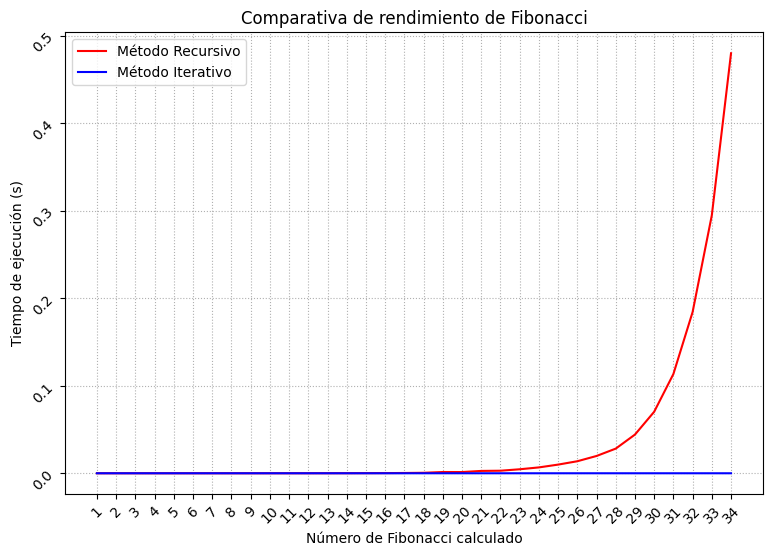

In [40]:
"""EJEMPLO 1"""
n_valores = list(range(1, 35, 1))
tiempos_rec = []
tiempos_iter = []

for num in n_valores:
    tiempos_rec.append(medir_tiempo(fib_rec, num))
    tiempos_iter.append(medir_tiempo(fib_iter, num))

# Gráfica de comparación
plt.figure(figsize=(9,6))
plt.plot(n_valores, tiempos_rec, 'r', label='Método Recursivo')
plt.plot(n_valores, tiempos_iter, 'b', label='Método Iterativo')
plt.xlabel('Número de Fibonacci calculado')
plt.ylabel('Tiempo de ejecución (s)')
plt.title('Comparativa de rendimiento de Fibonacci')
plt.legend(loc='upper left')
plt.xticks(n_valores, rotation=45)
plt.yticks(rotation=45)
plt.grid(True, linestyle='dotted')
plt.show()

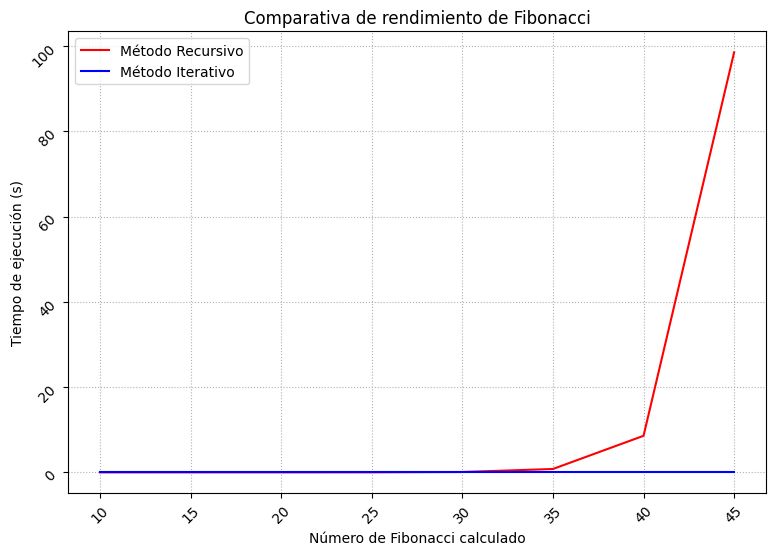

In [55]:
"""EJEMPLO 2"""
n_valores = list(range(10, 50, 5))
tiempos_rec = []
tiempos_iter = []

for num in n_valores:
    tiempos_rec.append(medir_tiempo(fib_rec, num))
    tiempos_iter.append(medir_tiempo(fib_iter, num))

# Gráfica de comparación
plt.figure(figsize=(9,6))
plt.plot(n_valores, tiempos_rec, 'r', label='Método Recursivo')
plt.plot(n_valores, tiempos_iter, 'b', label='Método Iterativo')
plt.xlabel('Número de Fibonacci calculado')
plt.ylabel('Tiempo de ejecución (s)')
plt.title('Comparativa de rendimiento de Fibonacci')
plt.legend(loc='upper left')
plt.xticks(n_valores, rotation=45)
plt.yticks(rotation=45)
plt.grid(True, linestyle='dotted')
plt.show()

## Devolución de cambio por técnica voraz

Resuelve el [Problema del Cambio de Moneda](https://es.wikipedia.org/wiki/Problema_de_cambio_de_monedas) utilizando una técnica voraz.

In [56]:
def cambio_voraz(cantidad, monedas):
    """
    Resuelve el problema del cambio de moneda utilizando un algoritmo voraz.
    """
    resultado = {}
    for moneda in monedas:
        if cantidad >= moneda:
            num_monedas = cantidad // moneda
            resultado[moneda] = num_monedas
            cantidad -= num_monedas * moneda
    return resultado

# Lista de monedas disponibles (ordenadas de mayor a menor)
monedas_disponibles = [50, 20, 10, 5, 2, 1]

# Cantidad a devolver
cantidad_a_devolver = 145
cambio = cambio_voraz(cantidad_a_devolver, monedas_disponibles)


print("EJEMPLO 1: Cambio para", cantidad_a_devolver, "unidades:")
for moneda, cantidad in cambio.items():
    if cantidad > 1:
        print(f"{cantidad} monedas de {moneda}")
    else:
        print(f"{cantidad} moneda de {moneda}")


EJEMPLO 1: Cambio para 145 unidades:
2 monedas de 50
2 monedas de 20
1 moneda de 5


In [57]:
# Cantidad a devolver
cantidad_a_devolver = 38
cambio = cambio_voraz(cantidad_a_devolver, monedas_disponibles)

print("EJEMPLO 2: Cambio para", cantidad_a_devolver, "unidades:")
for moneda, cantidad in cambio.items():
    if cantidad > 1:
        print(f"{cantidad} monedas de {moneda}")
    else:
        print(f"{cantidad} moneda de {moneda}")


EJEMPLO 2: Cambio para 38 unidades:
1 moneda de 20
1 moneda de 10
1 moneda de 5
1 moneda de 2
1 moneda de 1


## N-Reinas por técnica de vuelta atrás
Resuelve el [Problema de las N-Reinas](https://es.wikipedia.org/wiki/Problema_de_las_ocho_reinas) en un tablero de dimensión N mediante la técnica de la vuelta atrás (backtraking).

In [73]:
def es_seguro(tablero, fila, col):
    """Verifica si es seguro colocar una reina en la posición (fila, col) del tablero."""
    for i in range(fila):
        if tablero[i] == col or \
           tablero[i] - i == col - fila or \
           tablero[i] + i == col + fila:
            return False
    return True

def resolver_n_reinas(n, fila=0, tablero=None, soluciones=[]):
    """Resuelve el problema de N-Reinas utilizando backtracking."""
    if tablero is None:
        tablero = [-1] * n
    
    if fila == n:
        soluciones.append(tablero[:]) 
        return
    
    for col in range(n):
        if es_seguro(tablero, fila, col):
            tablero[fila] = col
            resolver_n_reinas(n, fila + 1, tablero, soluciones)
            tablero[fila] = -1  # Retroceder (backtracking)
    
    return soluciones

def imprimir_solucion(solucion):
    """Imprime una solución en formato de tablero de forma visual."""
    n = len(solucion)
    borde = "+" + "---+" * n
    for fila in solucion:
        print(borde)
        linea = "|"
        for i in range(n):
            linea += " R |" if i == fila else "   |"
        print(linea)
    print(borde + "\n")


n = 6
soluciones = resolver_n_reinas(n)
num_mostrar = min(3, len(soluciones))
print(f"EJEMPLO 1: Se han encontrado {len(soluciones)} soluciones distintas para un tablero de {n}x{n}. A continuación se muestran {num_mostrar} ejemplos:\n")
for sol in soluciones[:num_mostrar]: 
    imprimir_solucion(sol)


EJEMPLO 1: Se han encontrado 4 soluciones distintas para un tablero de 6x6. A continuación se muestran 3 ejemplos:

+---+---+---+---+---+---+
|   | R |   |   |   |   |
+---+---+---+---+---+---+
|   |   |   | R |   |   |
+---+---+---+---+---+---+
|   |   |   |   |   | R |
+---+---+---+---+---+---+
| R |   |   |   |   |   |
+---+---+---+---+---+---+
|   |   | R |   |   |   |
+---+---+---+---+---+---+
|   |   |   |   | R |   |
+---+---+---+---+---+---+

+---+---+---+---+---+---+
|   |   | R |   |   |   |
+---+---+---+---+---+---+
|   |   |   |   |   | R |
+---+---+---+---+---+---+
|   | R |   |   |   |   |
+---+---+---+---+---+---+
|   |   |   |   | R |   |
+---+---+---+---+---+---+
| R |   |   |   |   |   |
+---+---+---+---+---+---+
|   |   |   | R |   |   |
+---+---+---+---+---+---+

+---+---+---+---+---+---+
|   |   |   | R |   |   |
+---+---+---+---+---+---+
| R |   |   |   |   |   |
+---+---+---+---+---+---+
|   |   |   |   | R |   |
+---+---+---+---+---+---+
|   | R |   |   |   |   

In [74]:
n_2 = 4
soluciones = resolver_n_reinas(n_2, 0, None, [])
num_mostrar = min(3, len(soluciones))
print(f"EJEMPLO 2: Se han encontrado {len(soluciones)} soluciones distintas para un tablero de {n}x{n}. A continuación se muestran {num_mostrar} ejemplos:\n")
for sol in soluciones[:num_mostrar]: 
    imprimir_solucion(sol)

EJEMPLO 2: Se han encontrado 2 soluciones distintas para un tablero de 6x6. A continuación se muestran 2 ejemplos:

+---+---+---+---+
|   | R |   |   |
+---+---+---+---+
|   |   |   | R |
+---+---+---+---+
| R |   |   |   |
+---+---+---+---+
|   |   | R |   |
+---+---+---+---+

+---+---+---+---+
|   |   | R |   |
+---+---+---+---+
| R |   |   |   |
+---+---+---+---+
|   |   |   | R |
+---+---+---+---+
|   | R |   |   |
+---+---+---+---+

